In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime as dt
import os
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from dtw import dtw
from sklearn.metrics import pairwise_distances
PRE_NAME = "onemin_ohlc_"
BEGIN_TIME = "09:00:00"
END_TIME = "11:00:00"
NUM_CLUSTER = 50
def load_data():
    X = []
    Y = []
    # df = pd.read_csv(os.path.join('dataset', '2327', PRE_NAME+"20180612.csv"))
    # mask = (df.loc[:, "time"] >= BEGIN_TIME) & (df.loc[:, "time"] <= END_TIME)
    # front_df = df[mask].loc[:, "return"]
    # end_df = df[~mask].loc[:, "return"]
    # X.append(np.array(front_df))
    # Y.append(np.array(end_df))
    # """我是分隔線^^~"""
    # df = pd.read_csv(os.path.join('dataset', '2327', PRE_NAME+"20180613.csv"))
    # mask = (df.loc[:, "time"] >= BEGIN_TIME) & (df.loc[:, "time"] <= END_TIME)
    # front_df = df[mask].loc[:, "return"]
    # end_df = df[~mask].loc[:, "return"]
    # X.append(np.array(front_df))
    # Y.append(np.array(end_df))
    
    
    for sid in tqdm(os.listdir(os.path.join('dataset'))):
        for file in os.listdir(os.path.join('dataset', sid)):
            # print(file)
            df = pd.read_csv(os.path.join('dataset', sid, file))
            df = df.take(np.arange(0, len(df), 5))
            mask = (df.loc[:, "time"] >= BEGIN_TIME) & (df.loc[:, "time"] <= END_TIME)
            front_df = df[mask].loc[:, "return"]
            # print(front_df)
            # exit()
            end_df = df[~mask].loc[:, "return"]
            
            if len(front_df) == (121 // 5 +1):
                
                X.append(np.array(front_df))
                Y.append(np.array(end_df))
    
# print(end_df)
    # df = pd.read_csv(os.path.join('dataset', '2327', PRE_NAME+"20180612.csv"))
    # print(len(X))
    # print(len(X[0]))
    # X = np.array(X)
    # print(X.shape)
        
    # exit()
    return np.array(X), np.array(Y)

def dtw_d(X, Y):
    manhattan_distance = lambda x, y: np.abs(x - y)
    d, cost_matrix, acc_cost_matrix, path = dtw(X, Y, dist=manhattan_distance)
    return d

def dtw_affinity(X):
    return pairwise_distances(X, metric=dtw_d)

X, Y = load_data()

100%|██████████| 13/13 [00:10<00:00,  1.28it/s]


In [5]:
print(X.shape)

(1674, 25)


In [6]:
ac = AgglomerativeClustering(n_clusters = NUM_CLUSTER,
                             affinity = dtw_affinity,
                             linkage = 'complete')
X_label = ac.fit_predict(X)

In [7]:
X_label

array([36, 31, 36, ...,  2,  0, 40], dtype=int64)

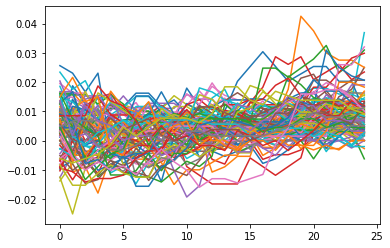

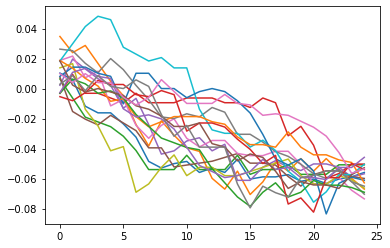

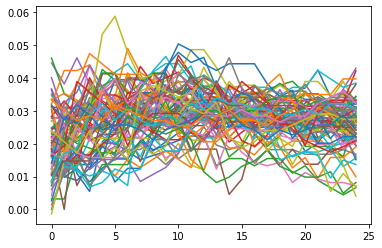

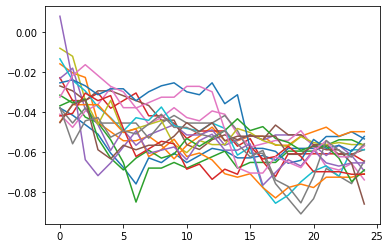

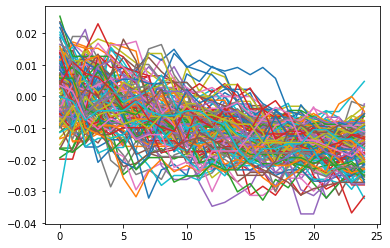

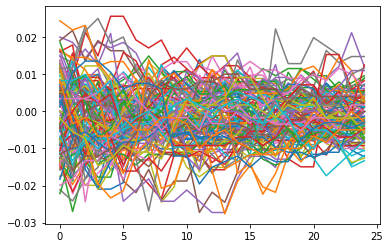

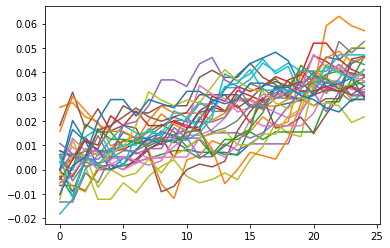

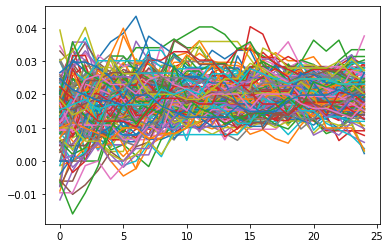

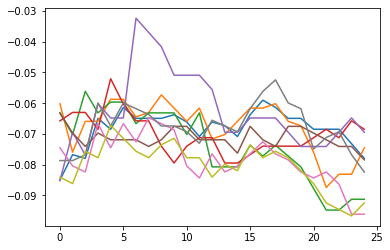

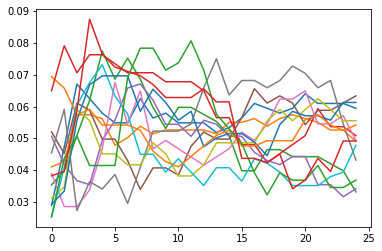

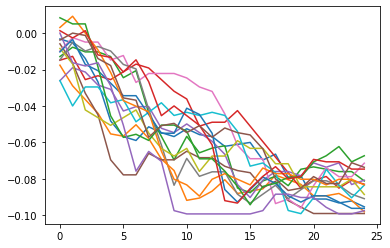

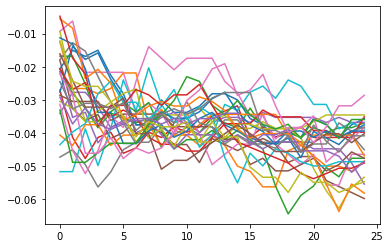

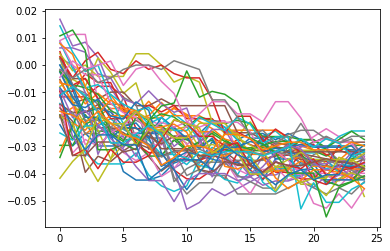

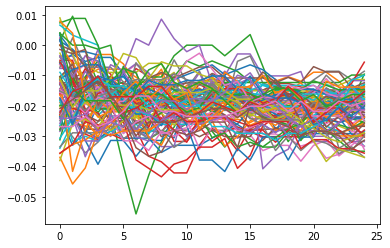

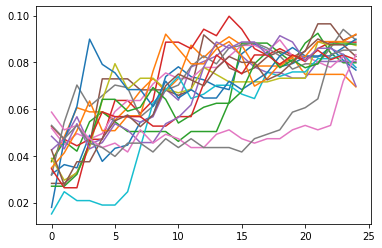

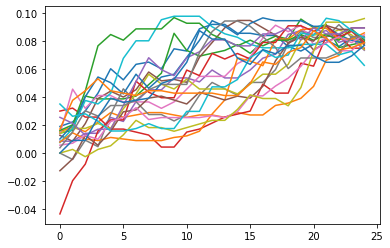

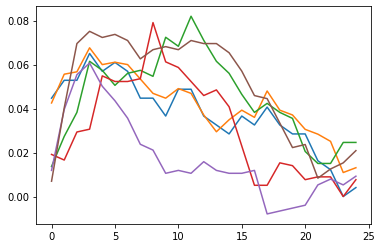

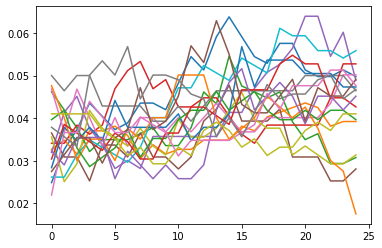

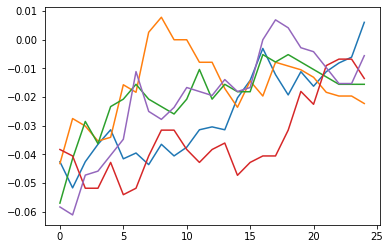

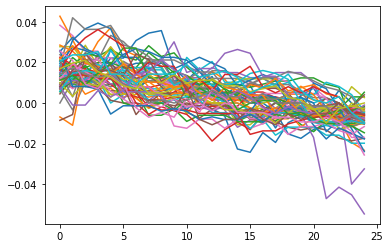

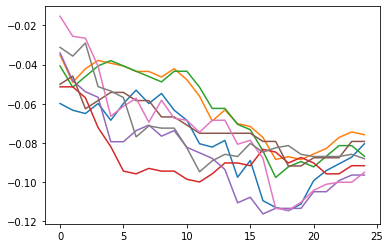

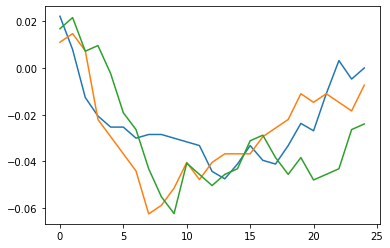

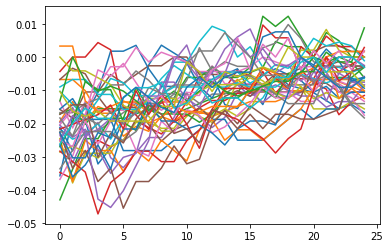

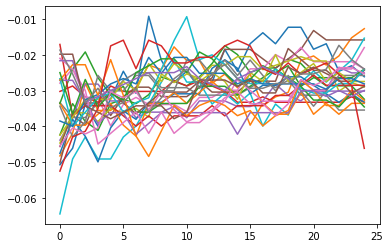

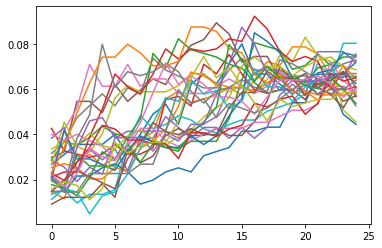

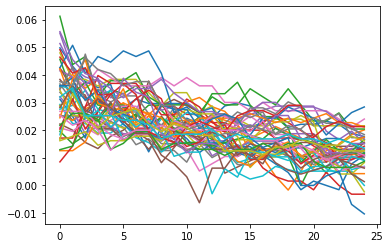

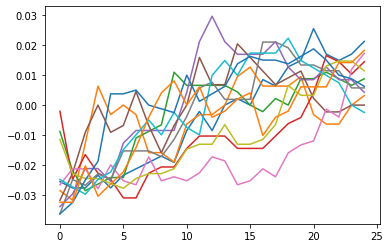

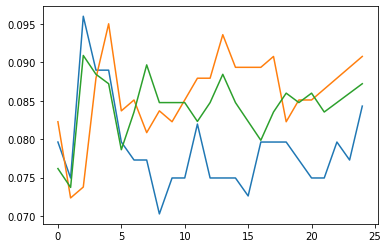

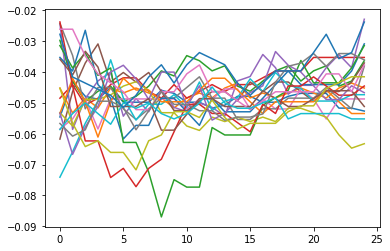

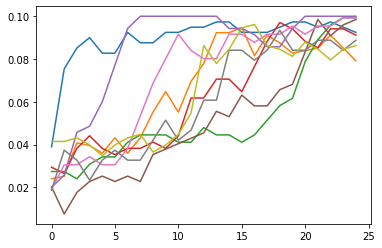

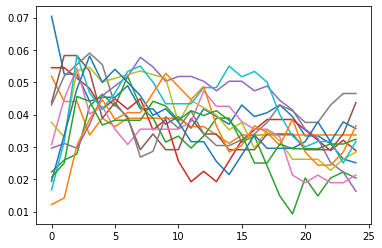

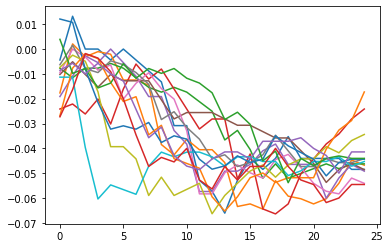

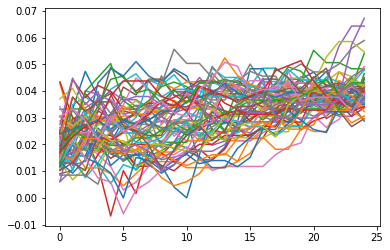

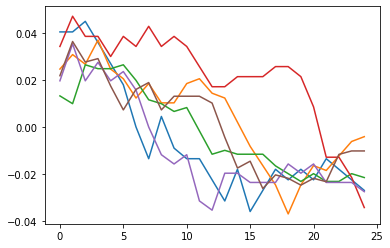

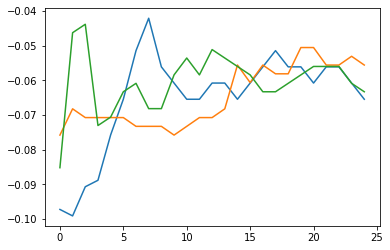

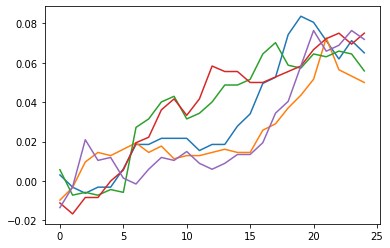

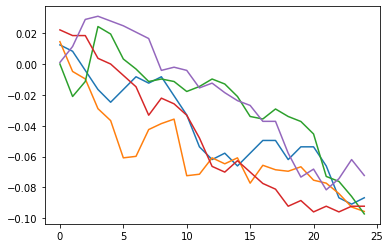

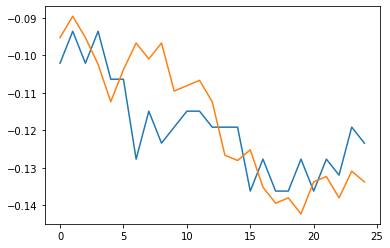

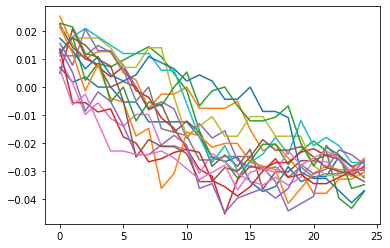

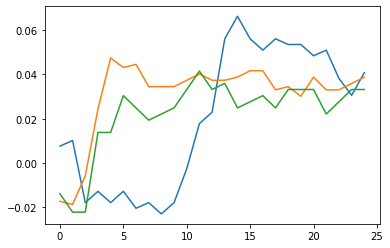

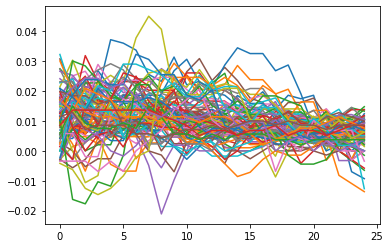

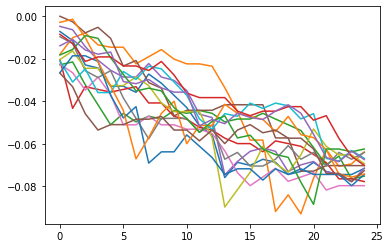

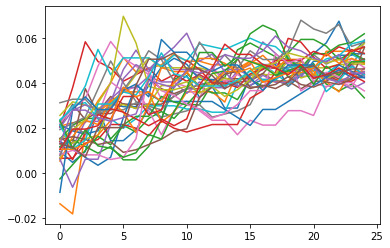

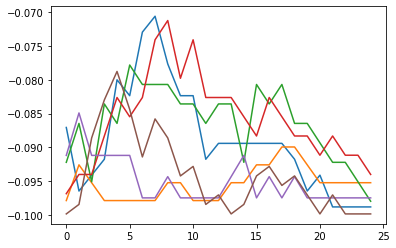

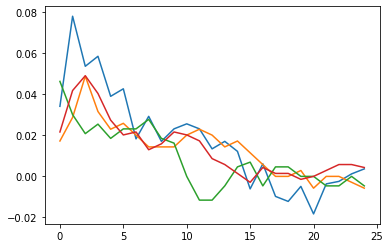

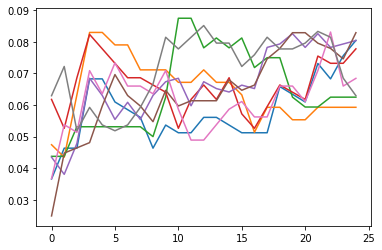

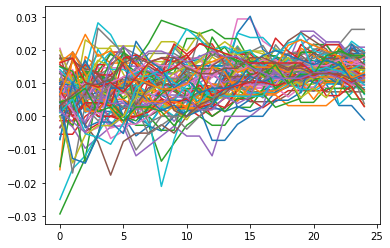

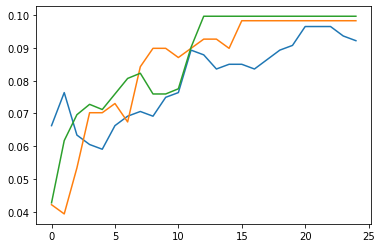

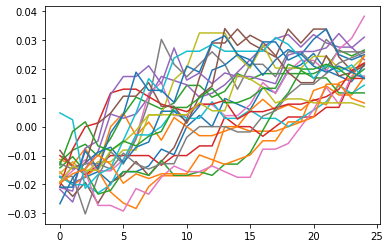

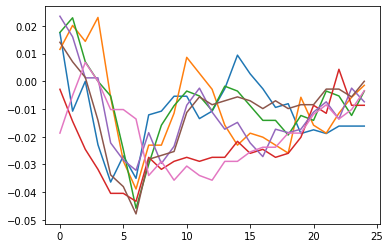

In [8]:
for n in range(NUM_CLUSTER):
    for i in range(len(X)):
    #     plt.subplot(10, 1, X_label[i]+1)
        if X_label[i] == n:
            plt.plot(X[i])
    plt.show()

In [9]:
def make_long_simple(y, cost):
    return y.max() - y[0] - cost
def make_short_simple(y, cost):
    return y[0] - y.min() - cost
def make_long_max_lost(y, cost):
    return y.min() - y[0] - cost
def make_short_max_lost(y, cost):
    return y[0] - y.max() - cost

In [10]:
profit_long_array = np.zeros(NUM_CLUSTER)
profit_short_array = np.zeros(NUM_CLUSTER)
lost_long_array = np.zeros(NUM_CLUSTER)
lost_short_array = np.zeros(NUM_CLUSTER)
num_long_array = np.zeros(NUM_CLUSTER).astype("int")
num_short_array = np.zeros(NUM_CLUSTER).astype("int")

In [11]:
profit_long_array.shape

(50,)

In [12]:
for i in range(len(X)):
    profit_long_array[X_label[i]] += make_long_simple(Y[i], 0.002)
    profit_short_array[X_label[i]] += make_short_simple(Y[i], 0.002)
    lost_long_array[X_label[i]] += make_long_max_lost(Y[i], 0.002)
    lost_short_array[X_label[i]] += make_short_max_lost(Y[i], 0.002)
    num_long_array[X_label[i]] += 1
    num_short_array[X_label[i]] += 1
print(profit_long_array)
print(profit_short_array)
print(lost_long_array)
print(lost_short_array)
print(num_long_array)
print(num_short_array)

[ 1.02659784  0.26222199  0.84341681  0.06873012  0.93624636  0.91051522
  0.33265282  1.34029719  0.05221971  0.13623851  0.10770505  0.16468621
  0.19649594  0.70413535  0.19124313  0.22870167  0.02132383  0.26309764
  0.09717009  0.47934743  0.0151934   0.08439834  0.42286481  0.31458964
  0.43833177  0.33806676  0.1841714   0.02381809  0.31187294  0.03450764
  0.10627655  0.24905575  0.89495091  0.18738182  0.1044975   0.06138358
  0.13479673  0.02154402  0.15981723  0.07186119  0.86201771  0.12690538
  0.56368575 -0.00204974  0.04505929  0.11860123  0.91774037 -0.00311816
  0.12778161  0.12274429]
[ 9.10683169e-01  3.25279656e-01  9.94621843e-01  3.15112014e-01
  1.79475795e+00  1.35416169e+00  3.01908161e-01  1.40320704e+00
  9.59187886e-02  2.23028531e-01  1.00140937e-01  3.71060880e-01
  8.88543066e-01  1.09312925e+00  1.40476475e-01  2.88859232e-01
  2.04678216e-01  2.25587160e-01  1.31234909e-01  6.32970461e-01
  9.25130642e-02  2.56455696e-02  4.16086832e-01  1.96872810e-01


In [13]:
import pickle
pickle.dump(ac, open("ac_model2.pc", 'wb'))